<a href="https://colab.research.google.com/github/Asadkhan-786/Notes-Computer-Science-/blob/Pandas/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

In [1]:
## Import pandas
import pandas as pd

## import seaborn
import seaborn as sns

## import numpy
import numpy as np

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Univariate Analysis -- Studying Variation



In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


#### Categorical Variables

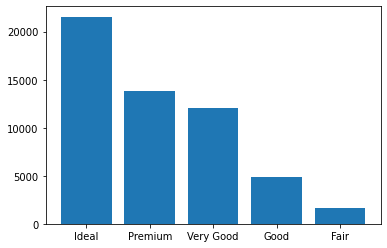

In [4]:
## Let's see the number of diamonds for each different type of cuts

## Keep this cell.

cuts = diamonds.cut.value_counts()

import matplotlib.pyplot as plt 
%matplotlib inline

plt.bar(x = cuts.index, height = cuts.values)
plt.draw()

Text(0.5, 1.0, 'Diamonds Data Counts by Cuts')

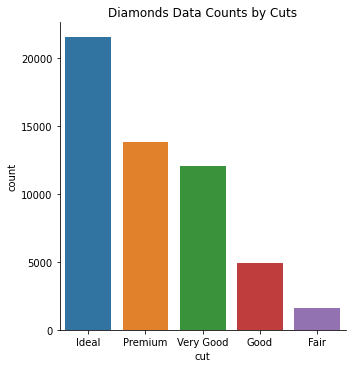

In [5]:
## we can use catplot for showing the count
plot = sns.catplot(data= diamonds, kind = 'count', x = 'cut')


## Note that since seaborn is built on top of matplotlib
## we can use matplotlib features like adding a title

plot.ax.set_title('Diamonds Data Counts by Cuts')

## note that we could also set the order of the categories 
## by order= ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#### Continuous Variables


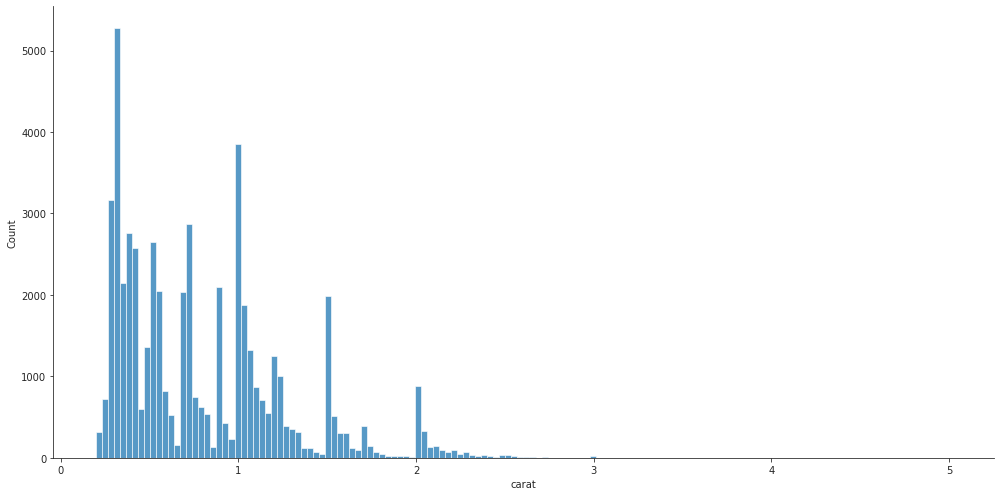

In [6]:
sns.set_style('ticks')

## we can use displot to see the distribution of 'carat' colum.
plot = sns.displot(data = diamonds, x= 'carat', kind = 'hist', height= 7, aspect = 2)

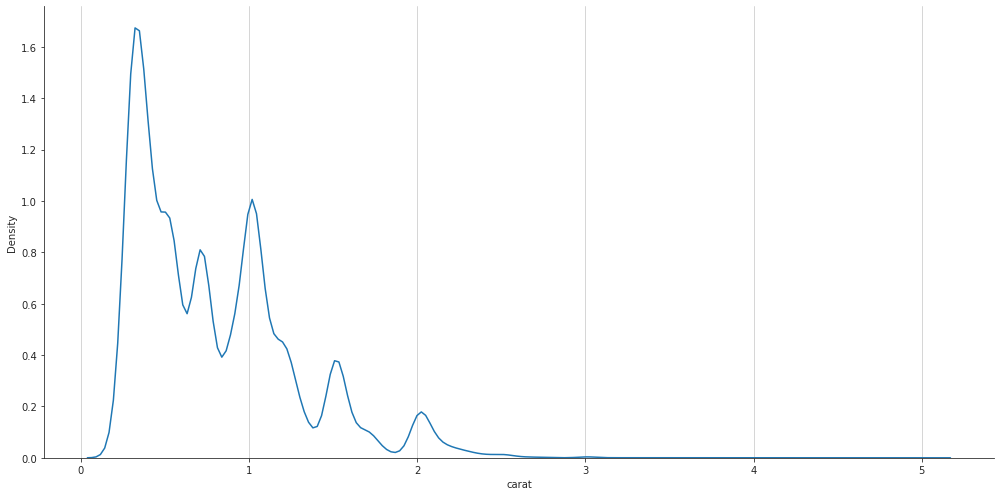

In [7]:
## or we can just take a look at the densities
plot = sns.displot(data = diamonds, x= 'carat', kind = 'kde', height= 7, aspect = 2)

## note that we can add a grid also
plot.ax.grid(axis = 'x')

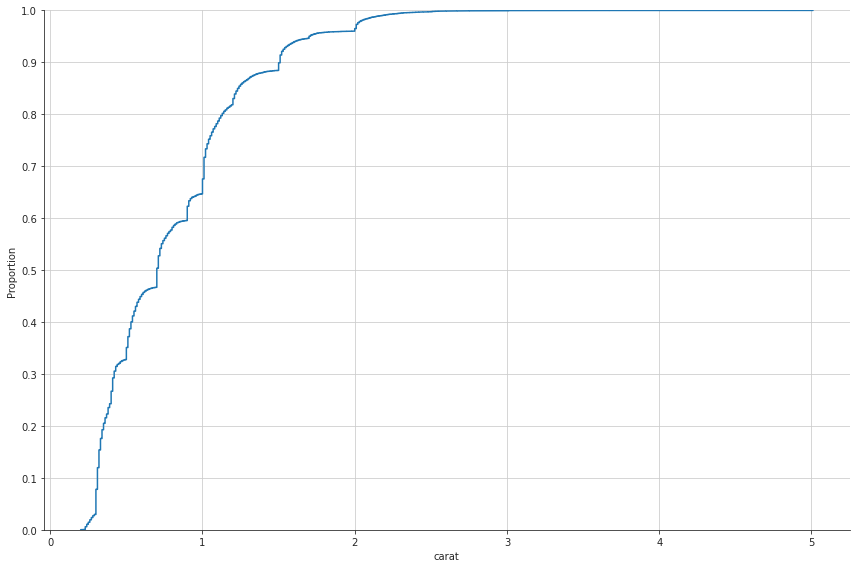

In [8]:
plot= sns.displot(data=diamonds, kind="ecdf", x="carat",height= 8, aspect = 1.5)
plot.ax.set_yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plot.ax.grid()

__Price__



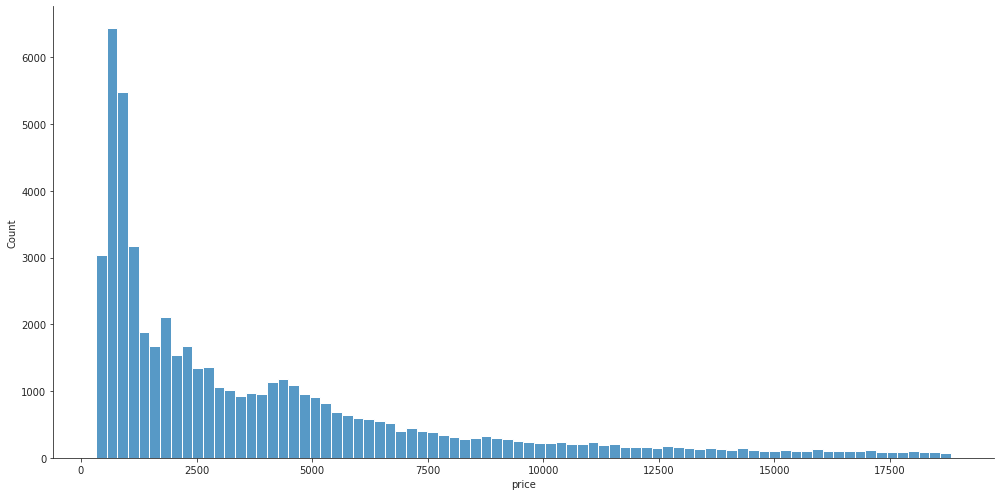

In [9]:
plot = sns.displot(diamonds, x= 'price', kind= 'hist', height= 7, aspect= 2)

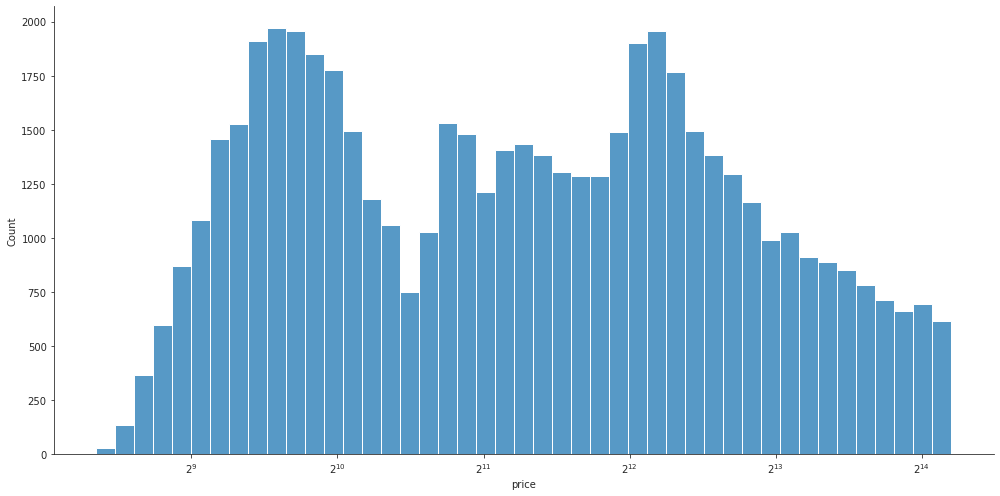

In [10]:
## note also that we can make a transformation to see the distribution in log scale
plot = sns.displot(diamonds, x= 'price', kind = 'hist', 
                   log_scale = 2, height= 7, aspect=2)

### Multivariate Distribution - Study of covariation

#### Categorical Variables vs Categorical Variables


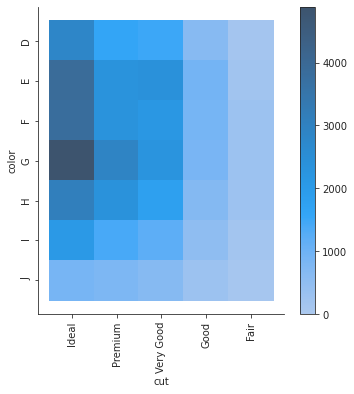

In [11]:
plot = sns.displot(diamonds, x="cut", y="color", cbar = True)
plot.ax.tick_params(labelrotation = 90)

#### Categorical vs Numerical varibles

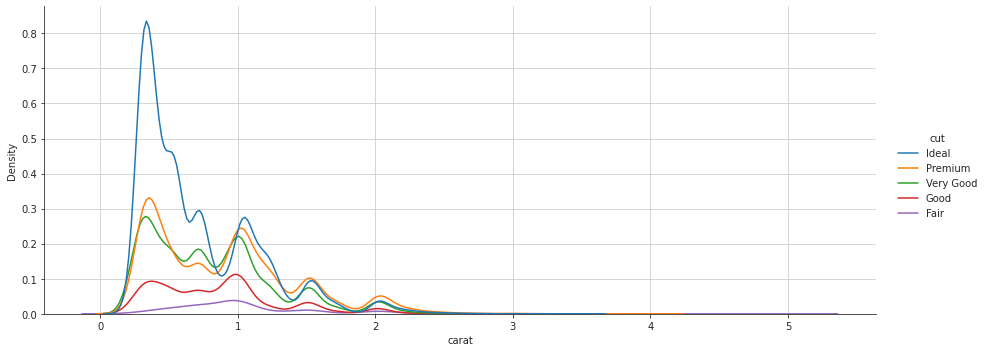

In [12]:
plot= sns.displot(data=diamonds, kind="kde", x="carat", 
                  hue = 'cut', height= 5, aspect = 2.5)
plot.ax.grid()

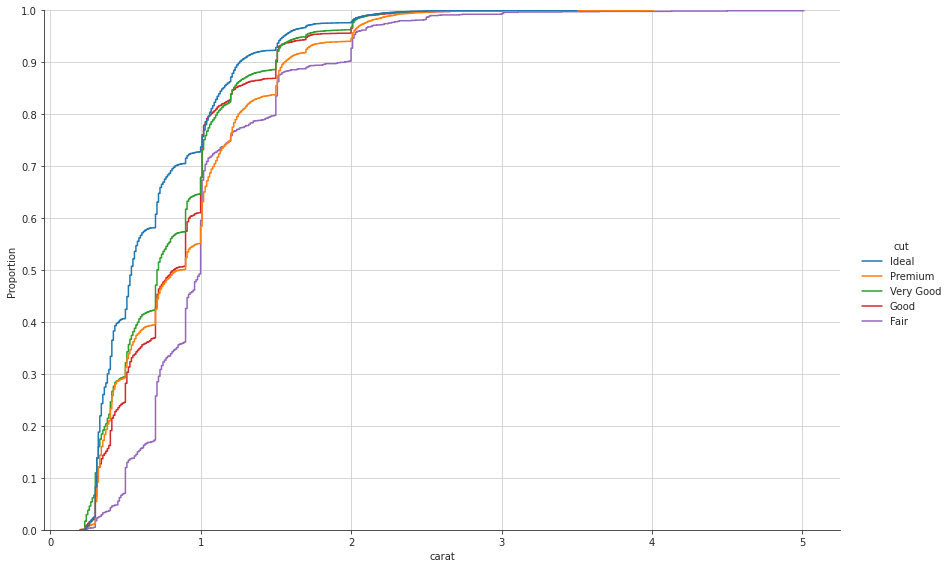

In [13]:
plot= sns.displot(data=diamonds, kind="ecdf", x="carat", 
                  hue = 'cut', height= 8, aspect = 1.5)
plot.ax.set_yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plot.ax.grid()

__Boxplots__

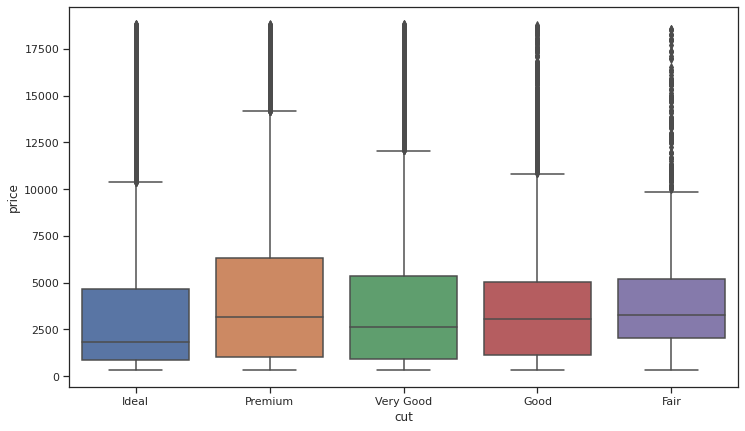

In [14]:
sns.set(rc={"figure.figsize":(12, 7)}) #width=12, #height=7
sns.set_style('ticks')

plot = sns.boxplot(x = 'cut', y = 'price' , data = diamonds)

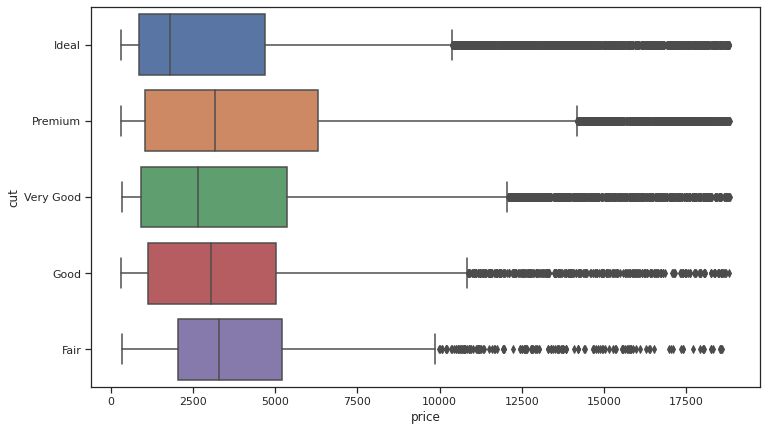

In [15]:
plot = sns.boxplot(y = 'cut', x = 'price', data = diamonds)

__Violin Plots__

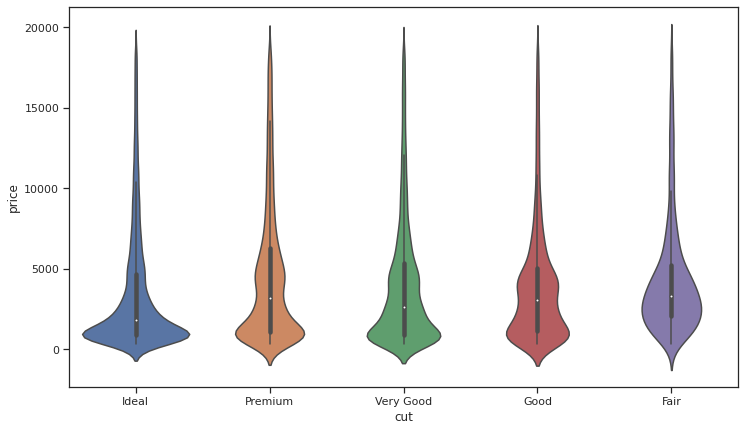

In [16]:
sns.violinplot(data = diamonds, x= 'cut', y = 'price')

#### Continuous to Continuous Variables

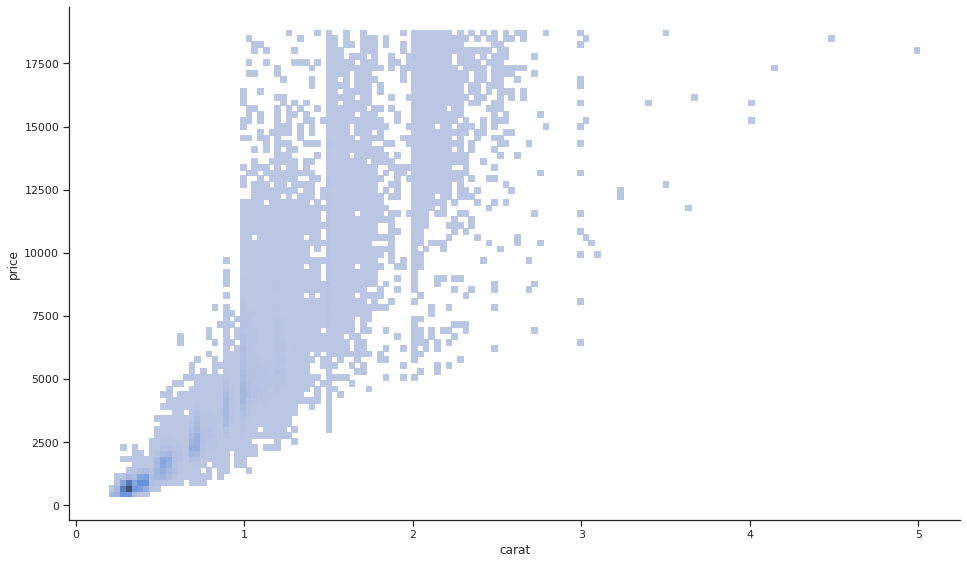

In [17]:
sns.displot(data = diamonds, x="carat", y="price", height= 8, aspect= 1.7)

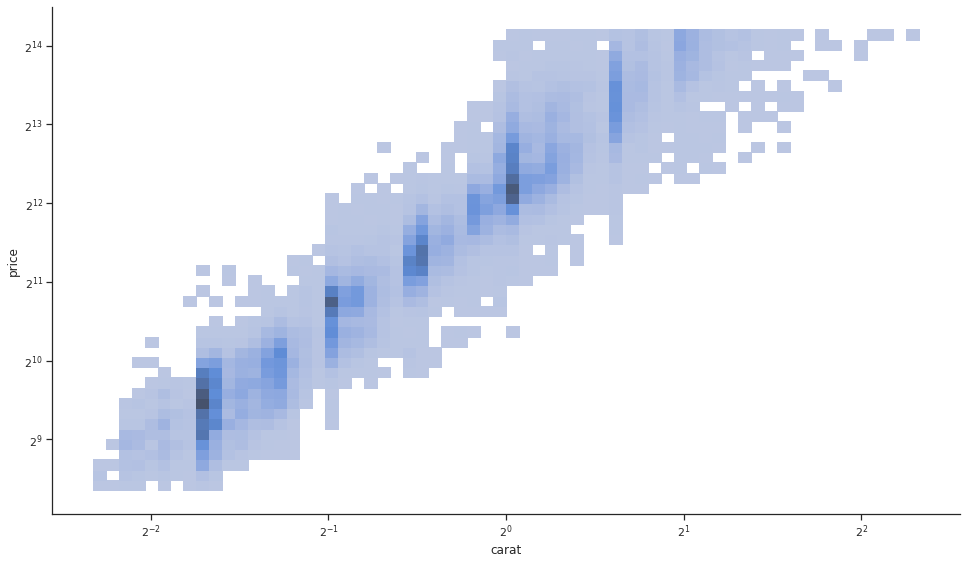

In [18]:
sns.displot(data = diamonds, x="carat", y="price", 
            height= 8, aspect= 1.7, log_scale= 2)

## More than two-dimension

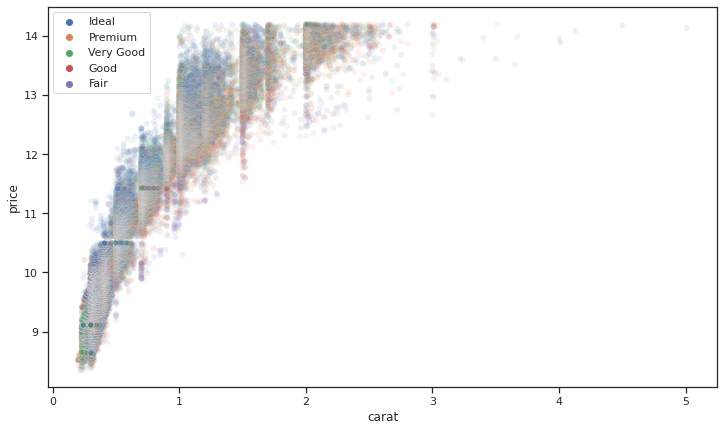

In [19]:
import numpy as np

x = diamonds.carat
y = np.log2(diamonds.price)
h = diamonds.cut.values
jitter = np.random.normal(size = len(x))
plot = sns.scatterplot(x= x, y = y, hue = h, alpha = 0.1 )

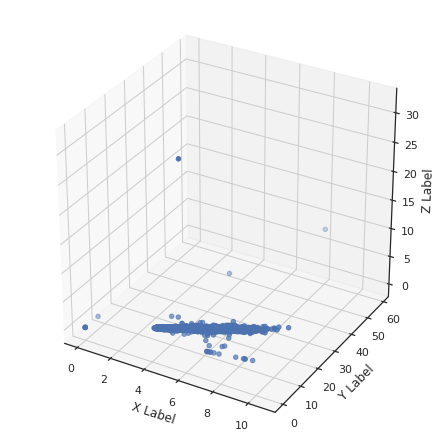

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1

x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)


ax.scatter(diamonds.x, diamonds.y, diamonds.z, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

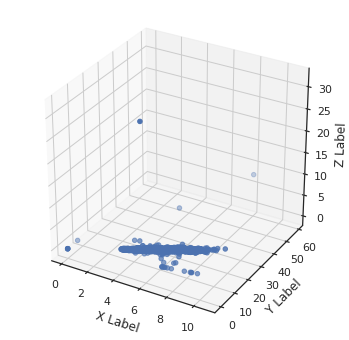

In [21]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d') # Method 2

x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)


ax.scatter(diamonds.x, diamonds.y, diamonds.z, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()